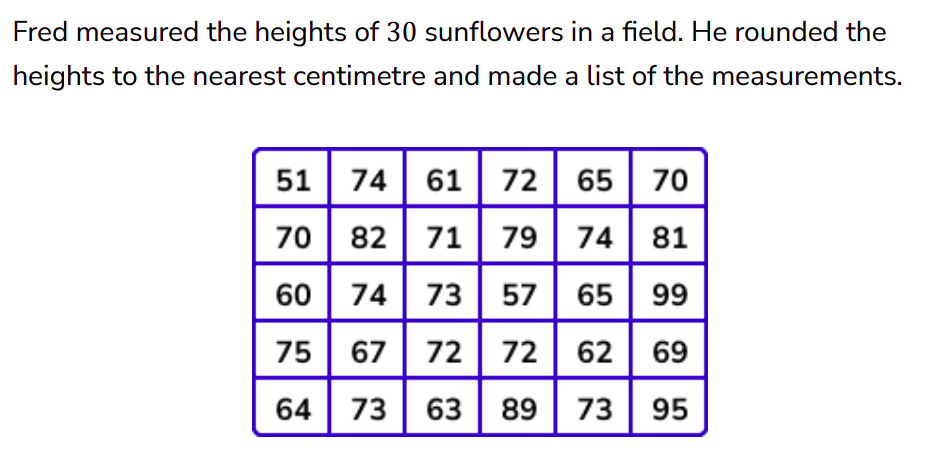


In [152]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [153]:

# Step 1: Define the matrix I
I = np.array([
    [51, 74, 61, 72, 65, 70],
    [70, 82, 71, 79, 74, 81],
    [60, 74, 73, 57, 65, 99],
    [75, 67, 72, 72, 62, 69],
    [64, 73, 63, 89, 73, 95]
])

In [154]:
#Converts 2D/3D array to 1D array
#Useful for:
#1. Statistical analysis
#2. Machine learning input preparation
#2. Feature extraction
#4. Histogram calculation
flattened = I.flatten() #Flatten the matrix

In [155]:
freq = Counter(flattened) #counter the frequency of each unique value

In [156]:
#Create a table for g and h(g)
table = pd.DataFrame(list(freq.items()), columns=['g', 'h(g)'])
table = table.sort_values(by='g').reset_index(drop=True)

In [157]:
#Display the table
print("Table of g and h(g):")
print(table)

Table of g and h(g):
     g  h(g)
0   51     1
1   57     1
2   60     1
3   61     1
4   62     1
5   63     1
6   64     1
7   65     2
8   67     1
9   69     1
10  70     2
11  71     1
12  72     3
13  73     3
14  74     3
15  75     1
16  79     1
17  81     1
18  82     1
19  89     1
20  95     1
21  99     1


In [158]:
# Define bins and class labels for the intervals:
bins = [50, 60, 70, 75, 85, 100]
labels = ["50-60", "60-70", "70-75", "75-85", "85-100"]

In [159]:
# Create a new column 'class' assigning each g value to its bin
#Use right = False to include the leftmost value in the interval
#Use right = True to include the rightmost value in the interval
table['class'] = pd.cut(table['g'], bins=bins, right=False, labels=labels)

In [160]:
print(table)

     g  h(g)   class
0   51     1   50-60
1   57     1   50-60
2   60     1   60-70
3   61     1   60-70
4   62     1   60-70
5   63     1   60-70
6   64     1   60-70
7   65     2   60-70
8   67     1   60-70
9   69     1   60-70
10  70     2   70-75
11  71     1   70-75
12  72     3   70-75
13  73     3   70-75
14  74     3   70-75
15  75     1   75-85
16  79     1   75-85
17  81     1   75-85
18  82     1   75-85
19  89     1  85-100
20  95     1  85-100
21  99     1  85-100


In [161]:
# Define a dictionary mapping each class label to its width
class_widths = {
    "50-60": 60 - 50,  # 10
    "60-70": 70 - 60,  # 10
    "70-75": 75 - 70,  # 5
    "75-85": 85 - 75,  # 10
    "85-100": 100 - 85 # 15
}

In [162]:
# Create a new column 'class_width' using the mapping
table['class_width'] = table['class'].map(class_widths)

print(table)

     g  h(g)   class  class_width
0   51     1   50-60           10
1   57     1   50-60           10
2   60     1   60-70           10
3   61     1   60-70           10
4   62     1   60-70           10
5   63     1   60-70           10
6   64     1   60-70           10
7   65     2   60-70           10
8   67     1   60-70           10
9   69     1   60-70           10
10  70     2   70-75            5
11  71     1   70-75            5
12  72     3   70-75            5
13  73     3   70-75            5
14  74     3   70-75            5
15  75     1   75-85           10
16  79     1   75-85           10
17  81     1   75-85           10
18  82     1   75-85           10
19  89     1  85-100           15
20  95     1  85-100           15
21  99     1  85-100           15


In [163]:
# Group the data by class to get number of values and total frequency h(g) within each class.
# Group data by class
grouped = table.groupby('class', dropna=False).agg(
    frequency=('h(g)', 'sum')
).reset_index()

/tmp/ipykernel_17883/3458564674.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = table.groupby('class', dropna=False).agg(


In [164]:
# Add class_width column
grouped['class_width'] = grouped['class'].map(class_widths)
#Extra update
# Avoid divide-by-zero errors
grouped['class_width'].replace(0, np.nan, inplace=True)
print(grouped)

    class  frequency  class_width
0   50-60          2           10
1   60-70          9           10
2   70-75         12            5
3   75-85          4           10
4  85-100          3           15


/tmp/ipykernel_17883/3854385918.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grouped['class_width'].replace(0, np.nan, inplace=True)


In [165]:
# Compute frequency density
grouped['frequency_density'] = grouped['frequency'] / grouped['class_width']
# Fill NaN values ONLY for numerical columns
grouped[['frequency', 'class_width', 'frequency_density']] = grouped[['frequency', 'class_width', 'frequency_density']].fillna(0)

In [166]:
print(grouped)

    class  frequency  class_width  frequency_density
0   50-60          2           10                0.2
1   60-70          9           10                0.9
2   70-75         12            5                2.4
3   75-85          4           10                0.4
4  85-100          3           15                0.2


Text(0, 0.5, 'Frequency Density')

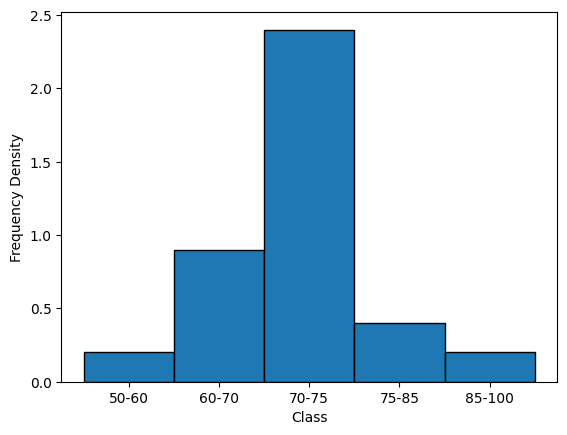

In [167]:
# Plot the histogram using frequency density
plt.bar(grouped['class'], grouped['frequency_density'], width=1, edgecolor='black')
plt.xlabel('Class')
plt.ylabel('Frequency Density')